In [1]:
import arcpy
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.pyplot import figure
from urllib3.exceptions import InsecureRequestWarning
from arcgis.gis import GIS
from IPython.display import display
from pyvis.network import Network
from pyvis.options import Options
import json
from datetime import date
import requests
import importlib
import urllib3
import sys
import config
import errno
import signal
import functools
import pickle
from typing import Callable
from openpyxl.utils.dataframe import dataframe_to_rows
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
print(urllib3.__version__)
import utils

importlib.reload(utils)
importlib.reload(config)

1.26.16


<module 'config' from 'C:\\Users\\omar9125\\OneDrive - Esri\\Working_Files_7292022\\DoE_Scriptign_5172022\\config.py'>

In [2]:
nx.__version__

'2.7'

In [3]:
### Log in to org

gis_source = utils.loggin_agol("config.py")

Config File found and will continue!
Loging in as odelariva into https://red-ps-fwp-prtl.esri.com/portal/home/! Please wait...
Success! Logged into GIS @ https://red-ps-fwp-prtl.esri.com/portal/home/ version:10.3 as odelariva!


**************************************************
Function 'loggin_agol' was executed in 3.8241s!
**************************************************




In [4]:
#PD Dataframe gets created here with Source and Depdendent_on fields
pdSource = pd.DataFrame(columns=['source','dependent_on'])
pdSource

,source,dependent_on


In [5]:
# Creating source users to iterate through them and printing them out
source_users = gis_source.users.search(query='', sort_field='username', sort_order='asc', max_users=10000, outside_org=False, exclude_system=True)

arcpy.AddMessage(source_users)
print('User list: Role')
for user in source_users:
    print(user.username + ":  " + str(user.role))
    arcpy.AddMessage(user.username + ":  " + str(user.role))

User list: Role
abosco:  org_publisher
archibus:  org_publisher
astanko:  org_publisher
ataylor:  org_publisher
bferri:  org_publisher
brichman:  org_user
cjennison:  org_publisher
clippers_demo:  org_publisher
clippers_demo_greeter:  org_user
clippers_demo_opsmanager:  org_user
clippers_demo_security1:  org_user
clippers_demo_vip1:  org_user
clippers_demo_vip2:  org_user
clippers_demo_vip3:  org_user
cwallis:  org_admin
esnipes:  org_publisher
esri_boundaries:  org_user
esri_demographics:  org_user
esri_livingatlas:  org_user
esri_nav:  org_user
gjobanputra:  org_publisher
indoorsuser1:  org_user
jdoherty:  org_publisher
jkang1:  org_user
jsnider:  org_admin
lkedharnath:  org_publisher
mlarif:  org_admin
mobrien:  org_admin
mpilouk_red_ps:  org_admin
mrosas:  org_publisher
msiddiqui:  org_publisher
nodered:  org_publisher
odelariva:  org_admin
portaladmin:  org_admin
rmanager:  org_user
rperez:  org_user
sfrank:  org_user
smanager:  org_user
thahka:  org_admin
tlim_indoors:  org_publi

In [16]:
### DO NOT RUN AGAIN
type_list = []
counter = 0
for user in source_users:
    user_content = user.items()
    for items in user_content:
        counter += 1
        print(items.type)
        type_list.append(items.type)
print(counter)

Service Definition
Feature Service
Web Map
Service Definition
Feature Service
Scene Service
Service Definition
Feature Service
Web Scene
Mobile Map Package
Service Definition
Feature Service
Web Map
Map Service
Network Analysis Service
Web Map
Web Map
Dashboard
Map Service
Web Map
Service Definition
Feature Service
Web Map
Service Definition
Dashboard
Web Experience
Web Experience
Stream Service
Application
Map Service
Network Analysis Service
Service Definition
Feature Service
Service Definition
Feature Service
Service Definition
Feature Service
Web Map
Indoors Map Configuration
Web Mapping Application
Service Definition
Feature Service
Web Map
Indoors Map Configuration
Service Definition
Feature Service
Map Service
Network Analysis Service
Service Definition
Feature Service
Scene Service
Service Definition
Feature Service
Scene Service
Service Definition
Feature Service
Scene Service
Service Definition
Feature Service
Scene Service
Service Definition
Feature Service
Service Definitio

Mobile Map Package
Mobile Map Package
Service Definition
Feature Service
Service Definition
Feature Service
Service Definition
Feature Service
Web Mapping Application
Mobile Map Package
Mobile Map Package
Map Service
Web Map
Indoors Map Configuration
Map Service
Network Analysis Service
Application
Web Mapping Application
Map Service
Web Map
Indoors Map Configuration
Map Service
Network Analysis Service
Map Service
Web Map
Indoors Map Configuration
Map Service
Network Analysis Service
Map Service
Network Analysis Service
Web Mapping Application
Map Service
Web Map
Indoors Map Configuration
Map Service
Web Map
Indoors Map Configuration
Web Mapping Application
Map Service
Network Analysis Service
Service Definition
Feature Service
Scene Service
Service Definition
Feature Service
Scene Service
Service Definition
Feature Service
Scene Service
Service Definition
Feature Service
Scene Service
Web Scene
Map Service
Web Map
Indoors Map Configuration
Web Mapping Application
Service Definition
F

In [17]:
## Create set of all the types available. 
myset = set(type_list)
print(myset)

for sets in myset:
    print(sets)

{'CSV', 'Web Mapping Application', 'Web Map', 'Stream Service', 'Service Definition', 'Shapefile', 'Image Service', 'GeoJson', 'Web Experience', 'Geometry Service', 'Experience Builder Widget', 'Vector Tile Package', 'Feature Service', 'Scene Service', 'Web Experience Template', 'WMS', 'Geoprocessing Service', 'Network Analysis Service', 'Vector Tile Service', 'CSV Collection', 'Application', 'File Geodatabase', 'Web Scene', 'Dashboard', 'Indoors Map Configuration', 'Map Service', 'Mobile Map Package', 'Data Store', 'Image', 'Code Attachment'}
CSV
Web Mapping Application
Web Map
Stream Service
Service Definition
Shapefile
Image Service
GeoJson
Web Experience
Geometry Service
Experience Builder Widget
Vector Tile Package
Feature Service
Scene Service
Web Experience Template
WMS
Geoprocessing Service
Network Analysis Service
Vector Tile Service
CSV Collection
Application
File Geodatabase
Web Scene
Dashboard
Indoors Map Configuration
Map Service
Mobile Map Package
Data Store
Image
Code At

In [18]:
### DO NOT RUN AGAIN
for user in source_users:
    user_content = user.items()
    for items in user_content:
        for dep in items.dependent_upon()['list']:
            print(dep)

{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}
{'dependencyType': 'id', 'id': '84b3d44c9ebf4cffb6414b34957f31a2'}
{'dependencyType': 'url', 'url': 'https://services.arcgisonline.com/arcgis/rest/services/Elevation/World_Hillshade/MapServer'}
{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}
{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}
{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}
{'dependencyType': 'id', 'id': 'c5b39c760f7f4675a08f6dff35b4069a'}
{'dependencyType': 'id', 'id': 'ef4bbefe0a544bd88d274b3fc303f229'}
{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}
{'dependencyType': 'id', 'id': 'f73c57b52fe546b6ad933d7b56e5bd10'}
{'dependencyType': 'url', 'url': 'https://services.arcgisonline.com/arcgis/rest/services/Elevation/World_Hillshade/MapServer'}
{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}
{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}
{'dependencyType': 'id', 'id': '84b3d44c9ebf4cffb6414b34957f31a2'}
{'dependency

{'dependencyType': 'serverId', 'id': 'gdjRzr7web5Hh5RQ'}
{'dependencyType': 'serverId', 'id': 'gdjRzr7web5Hh5RQ'}
{'dependencyType': 'serverId', 'id': 'gdjRzr7web5Hh5RQ'}
{'dependencyType': 'serverId', 'id': 'gdjRzr7web5Hh5RQ'}
{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}
{'dependencyType': 'id', 'id': 'de10b25cd3cc46d29eb4387b0e52b050'}
{'dependencyType': 'url', 'url': 'https://red-ps-fwp-prtl.esri.com/server/rest/services/Clippers_Space_Planner_Core_Layers_4_29_21/FeatureServer/6'}
{'dependencyType': 'url', 'url': 'https://red-ps-fwp-prtl.esri.com/server/rest/services/Clippers_Space_Planner_Core_Layers_4_29_21/FeatureServer/5'}
{'dependencyType': 'url', 'url': 'https://services.arcgisonline.com/arcgis/rest/services/Elevation/World_Hillshade/MapServer'}
{'dependencyType': 'id', 'id': 'b5b89c1c310b4b36807b68f021d2b651'}
{'dependencyType': 'id', 'id': '169c9c7d821a47699a16c7d115b50ac4'}
{'dependencyType': 'url', 'url': 'https://utility.arcgisonline.com/arcgis/rest/services/G

{'dependencyType': 'id', 'id': '5e9b3685f4c24d8781073dd928ebda50'}
{'dependencyType': 'id', 'id': '7465191cfa1f425fbe41e4d44450d559'}
{'dependencyType': 'id', 'id': 'd7397603e9274052808839b70812be50'}
{'dependencyType': 'id', 'id': '1ddbb25aa29c4811aaadd94de469856a'}
{'dependencyType': 'id', 'id': '4a3922d6d15f405d8c2b7a448a7fbad2'}
{'dependencyType': 'id', 'id': '2afe5b807fa74006be6363fd243ffb30'}
{'dependencyType': 'id', 'id': '97fa1365da1e43eabb90d0364326bc2d'}
{'dependencyType': 'id', 'id': 'ba52238d338745b1a355407ec9df6768'}
{'dependencyType': 'id', 'id': '10df2279f9684e4a9f6a7f08febac2a9'}
{'dependencyType': 'id', 'id': '30d6b8271e1849cd9c3042060001f425'}
{'dependencyType': 'id', 'id': '10df2279f9684e4a9f6a7f08febac2a9'}
{'dependencyType': 'id', 'id': '2a2e806e6e654ea78ecb705149ceae9f'}
{'dependencyType': 'id', 'id': '291da5eab3a0412593b66d384379f89f'}
{'dependencyType': 'id', 'id': '1768e8369a214dfab4e2167d5c5f2454'}
{'dependencyType': 'id', 'id': '291da5eab3a0412593b66d384379f8

{'dependencyType': 'id', 'id': 'b5b89c1c310b4b36807b68f021d2b651'}
{'dependencyType': 'id', 'id': 'd615462e59df49bfa3c4526fe6b87e6d'}
{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}
{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}
{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}
{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}
{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}
{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}
{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}
{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}
{'dependencyType': 'id', 'id': '50ebba944c064364a2e87a0ce339f621'}
{'dependencyType': 'id', 'id': 'a29517d9584246c88dee1f664286fb8e'}
{'dependencyType': 'id', 'id': '4e84011c72634116981ce3dea03fc19e'}
{'dependencyType': 'id', 'id': 'b525798a53b14c3aa4c79f41fb430c44'}
{'dependencyType': 'url', 'url': 'https://services.arcgisonline.com/arcgis/rest/services/Elevation/World_Hillshade/MapServer'}
{'dependencyTyp

{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}
{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}
{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}
{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}
{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}
{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}
{'dependencyType': 'serverId', 'id': 'gdjRzr7web5Hh5RQ'}
{'dependencyType': 'serverId', 'id': 'gdjRzr7web5Hh5RQ'}
{'dependencyType': 'serverId', 'id': 'gdjRzr7web5Hh5RQ'}
{'dependencyType': 'serverId', 'id': 'gdjRzr7web5Hh5RQ'}
{'dependencyType': 'serverId', 'id': 'gdjRzr7web5Hh5RQ'}
{'dependencyType': 'serverId', 'id': 'gdjRzr7web5Hh5RQ'}
{'dependencyType': 'id', 'id': '5e3a5291358e423ebdce8b22bde24037'}
{'dependencyType': 'id', 'id': '7abc9ad1c7d040cea41341f432d8b1bd'}
{'dependencyType': 'id', 'id': '371aca95b710476daff0fd5015a444c1'}
{'dependencyType': 'url', 'url': 'https://red-ps-fwp-prtl.esri.com/hosted/rest/services/Hosted/Clippers_Demo_Analog

{'dependencyType': 'serverId', 'id': 'gdjRzr7web5Hh5RQ'}
{'dependencyType': 'serverId', 'id': 'gdjRzr7web5Hh5RQ'}
{'dependencyType': 'serverId', 'id': 'gdjRzr7web5Hh5RQ'}
{'dependencyType': 'serverId', 'id': 'gdjRzr7web5Hh5RQ'}
{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}
{'dependencyType': 'serverId', 'id': 'gdjRzr7web5Hh5RQ'}
{'dependencyType': 'serverId', 'id': 'gdjRzr7web5Hh5RQ'}
{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}
{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}
{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}
{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}
{'dependencyType': 'serverId', 'id': 'gdjRzr7web5Hh5RQ'}
{'dependencyType': 'serverId', 'id': 'gdjRzr7web5Hh5RQ'}
{'dependencyType': 'serverId', 'id': 'gdjRzr7web5Hh5RQ'}
{'dependencyType': 'serverId', 'id': 'gdjRzr7web5Hh5RQ'}
{'dependencyType': 'serverId', 'id': 'gdjRzr7web5Hh5RQ'}
{'dependencyType': 'serverId', 'id': 'gdjRzr7web5Hh5RQ'}
{'dependencyType': 'id', 'id': 

In [6]:
def addDependency(item, dependency, pdArray, includeUrlDependencies= False):
#     guidMap[item.name] =  item.itemid
#         print("This is my GUID Item Name : " + item.name)
    guidMap[item.itemid] = str.format("{2} - {0} - {1} - {3}", item["title"], item.itemid, item["type"],user.username)
    if dependency['dependencyType'] == 'id':
        pdArray.loc[len(pdArray)] = [item.itemid,dependency['id']]
       # pdArray.loc[len(pdArray)] = [item.name,dependency['id']]
    elif (includeUrlDependencies == True and dependency['dependencyType'] == 'url'):
        pdSource.loc[len(pdSource)] = [item.itemid,dependency['url']]

In [7]:
guidMap = {}
for user in source_users:
    num_items = 0
    num_folders = 0
    print("Collecting item ids for {}".format(user.username))
    #arcpy.AddMessage("Collecting item ids for {}".format(user.username))

    user_content = user.items()
    source_items_by_id = {}

    # Get item ids from root folder first
    item_counter = 0
    for item in user_content:
        print(item.itemid)
        if user.username == None:
            print("**** "*50)
        guidMap[item.itemid] = str.format("{2} - {0} - {1} - {3}", item["title"], item.itemid, item["type"],user.username)
        #guidMap[item.itemid + " - " + user.username] = str.format("{2} \r\n {0} \r\n {1} \r\n {3}", item["title"], item.itemid, item["type"],user.username)
        #guidMap[item.name] = item.itemid
        source_items_by_id[item.itemid] = item
        if (item.dependent_upon()['total'] > 0):
            print("\nItem:  {2}  id {0} is dependent on these items:  {1}".format(item.itemid,item.dependent_upon(), item.title))
            for dependency in item.dependent_upon()['list']:
                addDependency(item, dependency, pdSource, False)
        item_counter =+ 1


    # Get item ids from each of the folders next
    folders = user.folders
    for folder in folders:
        num_folders += 1
        folder_items = user.items(folder=folder['title'])
        for item in folder_items:
            num_items += 1
            guidMap[item.itemid + " - " + user.username] = str.format("{0} ({1}) {2}", item["title"], item.itemid, user.username)
            source_items_by_id[item.itemid] = item
            if (item.dependent_upon()['total'] > 0):
                print("\n Item: {2}  id {0} is dependent on these items:  {1}".format(item.itemid,item.dependent_upon(), item.title))
                for dependency in item.dependent_upon()['list']:
               # for dependency in item.dependent_upon()['list']:
                    addDependency(item, dependency, pdSource, True)


    print("Number of folders for {} {} # Number of items checked {} ".format(user.username,str(num_folders), str(num_items)))
    print("="*100)
    print("="*100)

e99d7a746a434cd79979dff87579e44e
84b3d44c9ebf4cffb6414b34957f31a2

Item:  NAV_WebMap_WFL1  id 84b3d44c9ebf4cffb6414b34957f31a2 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}
b6996d1917e649dcb281653aeedb41dc

Item:  NAV_WebMap  id b6996d1917e649dcb281653aeedb41dc is dependent on these items:  {'total': 2, 'start': 1, 'num': 2, 'nextStart': -1, 'list': [{'dependencyType': 'id', 'id': '84b3d44c9ebf4cffb6414b34957f31a2'}, {'dependencyType': 'url', 'url': 'https://services.arcgisonline.com/arcgis/rest/services/Elevation/World_Hillshade/MapServer'}]}
1b10791c436645b38fa7ecddacc79443
5878d43cd7b64f49aaa129b92ee8f29c

Item:  NAV_Scene_WSL1  id 5878d43cd7b64f49aaa129b92ee8f29c is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}
ef4bbefe0a544bd88d274b3fc303f229

Item:  NAV_Scene_WSL1  id ef4bbefe0a


Item:  Network_Redlands_Clippers  id c72844a2e5db4583b372b3c429b30228 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'gdjRzr7web5Hh5RQ'}]}
135598d3825d47e5b53ec8e60592658f
371aca95b710476daff0fd5015a444c1

Item:  Clippers VIP and Parking Layers  id 371aca95b710476daff0fd5015a444c1 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}
2add0f571bcc4cf58086ad30c069a1fc
c1efad38ce8a498e9b286462b64bd03b

Item:  Clippers Demo Sensors  id c1efad38ce8a498e9b286462b64bd03b is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}
54bc183e69224aadb5d1939ae542b087
acd313211c0c4f90aec4b946d9d89303

Item:  Clippers Demo Viewer Web Map_WFL1  id acd313211c0c4f90aec4b946d9d89303 is dependent on these items:  {'total': 1, 'start': 1, 'nu


Item:  Clippers Demo Viewer Web Map 3_WFL1  id 2442060c5853495f9c09259f3d9a4224 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}
e987679d135d46e3beebeedcb627061d

Item:  Clippers Demo Viewer Web Map 3  id e987679d135d46e3beebeedcb627061d is dependent on these items:  {'total': 4, 'start': 1, 'num': 4, 'nextStart': -1, 'list': [{'dependencyType': 'id', 'id': '2442060c5853495f9c09259f3d9a4224'}, {'dependencyType': 'id', 'id': '371aca95b710476daff0fd5015a444c1'}, {'dependencyType': 'url', 'url': 'https://red-ps-fwp-prtl.esri.com/hosted/rest/services/Hosted/Clippers_VIP_and_Parking_Layers/FeatureServer/1'}, {'dependencyType': 'url', 'url': 'https://services.arcgisonline.com/arcgis/rest/services/Elevation/World_Hillshade/MapServer'}]}
8f443c1ae59c46a0abc1ae8d510a12d5
b98b46eb471c45efa95403a0b134a58b
fbb7b92d15a44f3db643c4b21f8312df

Item:  Clippers Demo Viewer Web Map 4_WFL1  id fbb7b92d15a

b5f8589a38f840d78ec23f0586ff8262

Item:  Clippers SP Test1  id b5f8589a38f840d78ec23f0586ff8262 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'gdjRzr7web5Hh5RQ'}]}
737d59f6ea65431da4acaedf0f53b8f5

Item:  Clippers SP Test1  id 737d59f6ea65431da4acaedf0f53b8f5 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'gdjRzr7web5Hh5RQ'}]}
2ceca93638154b9fbf10fc72ee774975
ce966230b4a74e31bcc8f6d2c5a31586

Item:  Clippers Space Planner Core Layers 4_29_21  id ce966230b4a74e31bcc8f6d2c5a31586 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'gdjRzr7web5Hh5RQ'}]}
3c65a5105c8447d5b60aecfb71a5a3a6

Item:  Clippers Space Planner Core Layers 4_29_21  id 3c65a5105c8447d5b60aecfb71a5a3a6 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, '

Number of folders for clippers_demo_vip3 0 # Number of items checked 0 
Number of folders for cwallis 0 # Number of items checked 0 
0929c2b7e5dc425d84b96d56fb3ae7cc
56aacb7ac7d746c5803f1f9eba14192a

Item:  CapitolVisitor_WFL1  id 56aacb7ac7d746c5803f1f9eba14192a is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}
b979e9949a0047ab9f3a4564af6803e8

Item:  CapitolVisitor  id b979e9949a0047ab9f3a4564af6803e8 is dependent on these items:  {'total': 2, 'start': 1, 'num': 2, 'nextStart': -1, 'list': [{'dependencyType': 'id', 'id': '56aacb7ac7d746c5803f1f9eba14192a'}, {'dependencyType': 'id', 'id': '273bf8d5c8ac400183fc24e109d20bcf'}]}
4090ff75195a444da61677c410f6f813
a0661f0d531c4d0eb31dfd01b576c726

Item:  Indiana Indoors Viewer  id a0661f0d531c4d0eb31dfd01b576c726 is dependent on these items:  {'total': 2, 'start': 1, 'num': 2, 'nextStart': -1, 'list': [{'dependencyType': 'id', 'id': 'b5b89c1c


Item:  TestScene_WSL1  id 2b8fa2a75de24c6faa4331f269fd869d is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}
8029d18c42d54a7aafbf071ad8021a49
0daa00d43de34d06b5242c3b7557ff93

Item:  TestScene_WSL2  id 0daa00d43de34d06b5242c3b7557ff93 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}
2fea947ca86c4ea18ff8e2f5e3cfe709

Item:  TestScene_WSL2  id 2fea947ca86c4ea18ff8e2f5e3cfe709 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}
97270d6062724f04a4a31a0929e7c32a
a7174e751258439bb8d6bd8323151262

Item:  TestScene_WFL1  id a7174e751258439bb8d6bd8323151262 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z


Item:  San Bernardino County Indoors  id bea1dd5899ac476eac6eda05e027d6d6 is dependent on these items:  {'total': 2, 'start': 1, 'num': 2, 'nextStart': -1, 'list': [{'dependencyType': 'id', 'id': 'b5b89c1c310b4b36807b68f021d2b651'}, {'dependencyType': 'id', 'id': '1a26f7cad8874eae9d152f7034af2aea'}]}
d1af5b19acca4016923dc21ac9c5f231

Item:  San Bernardino Space Planner  id d1af5b19acca4016923dc21ac9c5f231 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'id', 'id': 'a70ae1a6f72c465680d4c805fa098ca2'}]}
76db8484b54749359ff3d9407a697d3a

Item:  ImageryTest  id 76db8484b54749359ff3d9407a697d3a is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'PBmBua74vyJsUWOM'}]}
1ba8a4be8d3f42689dd8a55776ccf487

Item:  LAC_003_tif  id 1ba8a4be8d3f42689dd8a55776ccf487 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'depende

64480b5bfc474ab1a464fa18098c92e5
6cdf0a471d42472ba37bc03bd20376ae
827a622e4faf4cdd96a8569761733d26
e12e8599965c43af9632a5c9633c2994
1170bbf0d6174e068e8898ffd6ac75df
7514c429f55f4c738cdc92c641a28c7e
33d7549a2a33487c934c589000e161ae
e93f667564544283a4dfc80ac316d0ec
28c1b8d4bd0c4e12bcec4121c4ef66e4
ac57c1cd674949cfbf7e8faa173d5c6f
d424a80477a74155be7c8c50d75edf93
511816d08b184516bc7c617b638a3f3d
9e804cab175242a4a7875d746b99bb15
8df985e340554f39a69f558564a63fcb
00b92db3630d47c2bb3c745f6f5882f3
e443619091874d3c82e19e1114b3c37a
27bec9809e7b4d2baf917954f8d2a939
56902eef8a704f3a8c28b4e6c9370d23
c7318018125a400b97c1329fa446d868
56a2fc8df5064feaa21e95439354ff3c
d355c340934544fc96d1576e3805cd0a
b9db3aa7b23345c593c73f35865b33be
5c54339fff9d4882a13f2cbf57bd2a12
8c0cdcfe517147ffa6864dcdf26a34dc
c7577022cc164279bb2cde9b4195ab0e
9608bcf614cf493aa9fbfe5b2cdcf918
79546313d4504e7297160a8efbce2597
fdeb85182e314c6a983b525b10abe1a1
d7dc3a3210014346aba0ea4840c28c5f
2c81e167f8ef4155bb274e63d3f82292
53f56ec53c


 Item: San Manuel Indoor Viewer Map CNNPRJDEV WFL v4  id 94d8879851904afdbd31706dd2f5952f is dependent on these items:  {'total': 9, 'start': 1, 'num': 9, 'nextStart': -1, 'list': [{'dependencyType': 'url', 'url': 'https://red-ps-fwp-prtl.esri.com/server/rest/services/Indoor_Map_San_Manuel/FeatureServer/7'}, {'dependencyType': 'url', 'url': 'https://red-ps-fwp-prtl.esri.com/server/rest/services/Indoor_Map_San_Manuel/FeatureServer/1'}, {'dependencyType': 'url', 'url': 'https://red-ps-fwp-prtl.esri.com/server/rest/services/Indoor_Map_San_Manuel/FeatureServer/2'}, {'dependencyType': 'url', 'url': 'https://red-ps-fwp-prtl.esri.com/server/rest/services/Indoor_Map_San_Manuel/FeatureServer/0'}, {'dependencyType': 'url', 'url': 'https://red-ps-fwp-prtl.esri.com/server/rest/services/Indoor_Map_San_Manuel/FeatureServer/5'}, {'dependencyType': 'url', 'url': 'https://red-ps-fwp-prtl.esri.com/server/rest/services/Indoor_Map_San_Manuel/FeatureServer/6'}, {'dependencyType': 'url', 'url': 'https://re

10fc6cd377334569bf9abf693e2693f0
dee9a43960ec49bc94a84ee29b225dd4

Item:  Neighborhood Names GIS  id dee9a43960ec49bc94a84ee29b225dd4 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}
3a01479d0ad24fc6a4afa9e788779f16
39f489518d3a49149fb83ac63e184015
ac32ec9671934becb709632e4da9c5fe

Item:  Charted Territory Map  id ac32ec9671934becb709632e4da9c5fe is dependent on these items:  {'total': 2, 'start': 1, 'num': 2, 'nextStart': -1, 'list': [{'dependencyType': 'id', 'id': '1b243539f4514b6ba35e7d995890db1d'}, {'dependencyType': 'id', 'id': '1c365daf37a744fbad748b67aa69dac8'}]}
9bf5f6ae27a44a04bd4a51d606626df2
6bfb7cc9009940c2b5eff202caf7664e

Item:  Colored Pencil Map  id 6bfb7cc9009940c2b5eff202caf7664e is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'id', 'id': '4cf7e1fb9f254dcda9c8fbadb15cf0f8'}]}
47d7fb20b6e646d1af8d0e62c52c77ad

010e596aec52462d98fdefc0b88a09c4
bcde35f855b64381992269ac4bb1ae79
c521285401e64e67a1db632b8f7d06cb
e3b7b2c59287496d89debfdc683f1e9f
3b6c0b862d73455e8c46125b3921b504
21c8f5a9e43149eebb6d0a9039c1918d
2db8689ecf5f4546aaf2c8fae1507304
9c5c3e02a27a4697b42ec3a61c9338e2
4dea8aacfca241c884ec9469c48baa44
3e673b83f82341c2898f2a9a20959790

Item:  OpenStreetMap Vector Basemap  id 3e673b83f82341c2898f2a9a20959790 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'id', 'id': '3e1a00aeae81496587988075fe529f71'}]}
3815f9b73cae4eb6a864f0675e9983b4

Item:  OpenStreetMap Vector Basemap  id 3815f9b73cae4eb6a864f0675e9983b4 is dependent on these items:  {'total': 2, 'start': 1, 'num': 2, 'nextStart': -1, 'list': [{'dependencyType': 'id', 'id': '310f18d4ac5246199976396c933a977f'}, {'dependencyType': 'id', 'id': 'fae788aa91e54244b161b59725dcbb2a'}]}
82bb30400f894e3faa5c36c82af3ca44

Item:  OpenStreetMap Vector Basemap (Blueprint - WGS84)  id 82bb304

12acb6a45e0b4308b68afe3bbe654dc8
e0da7474b1cb49ee89ea09d05622a416
8117e77023c947c5ba61b5a3a356e376
1d17abbc3103418f9e7a36500a7922ca
35f68f203ec4488f93f454bf83958b42
281854e1342344db93470ecfa5dcb922
8b3edb54df464dc4917bdb597c55496d
b64d570aefc94c51bf5f0755d7791261
ebabe9e004ce421ba0e90e98b422c46a
f766a8e179114d7fa19cd41ae9a16c5c
9e856b21ec544409b76beb55869339e8
4db3616393fa40e0a766d80631704b0d
d2901924e314422f9b4a26d3b59c18de

 Item: _clone_ Neighborhood Names GIS  id 1115b99e295e4ee591f689249809ce94 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}
Number of folders for jsnider 4 # Number of items checked 3 
Number of folders for lkedharnath 1 # Number of items checked 0 
Number of folders for mlarif 0 # Number of items checked 0 
6839f192373142aeabdfcd89ae5e016b
baf3f818302643bc83dc08ca2e1be751
d5f01113b3704c54bbd1f10285def068
b5cfd14bae524b73a3fc48f3aafaa2b0

Item:  hq_space  id b5cfd1


Item:  Facebook Unified Indoor Viewer  id ed7f1b7e65564bdaa5af0b42aadc2b0e is dependent on these items:  {'total': 2, 'start': 1, 'num': 2, 'nextStart': -1, 'list': [{'dependencyType': 'id', 'id': 'b5b89c1c310b4b36807b68f021d2b651'}, {'dependencyType': 'id', 'id': 'b4e7aa0fb5134d46873a0db336b60790'}]}
c0a69601c1764cafb4d70524d371a214

Item:  Facebook Unified Network Services  id c0a69601c1764cafb4d70524d371a214 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'gdjRzr7web5Hh5RQ'}]}
6a6d7ab46f104933b559b3b76957d6d8

Item:  Facebook Unified Network Services  id 6a6d7ab46f104933b559b3b76957d6d8 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'gdjRzr7web5Hh5RQ'}]}
bc97eb0882234cdb99d6f49d8ca33175
2aa92db1b22b49cf93d52988dd7c2c0c

Item:  FB Test Scene_WSL1  id 2aa92db1b22b49cf93d52988dd7c2c0c is dependent on these items:  {'total': 1,


Item:  FB Test Scene 3_WSL3  id 4bd9ebf5d10b4ac093a52da1494779c7 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}
21a7f73149194ac3b788af6f75dabdc7

Item:  FB Test Scene 3_WSL3  id 21a7f73149194ac3b788af6f75dabdc7 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}
cb942b624273465b865b512ee3cccb62
fedeb33a345f4d9c866a7a4e6e479ba7

Item:  FB Test Scene 3_WSL4  id fedeb33a345f4d9c866a7a4e6e479ba7 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}
689ef7eeda0740abbd3c1c17d3a8ad84

Item:  FB Test Scene 3_WSL4  id 689ef7eeda0740abbd3c1c17d3a8ad84 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}
5d60


 Item: ArcGIS Indoors _ Sample Web Scene_WSL5  id 05ffb5743df94888bedb5bdca7a026df is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}

 Item: ArcGIS Indoors _ Sample Web Scene_WSL5  id ad6343793f1c41f688e5e3b528aa41c7 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}

 Item: ArcGIS Indoors _ Sample Web Scene_WSL6  id 1c61ea3f98a34cc1b12bf83d42be402a is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}

 Item: ArcGIS Indoors _ Sample Web Scene_WSL6  id c72f5e1d34334e8ab37470191fb31caf is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}

 Item: ArcGIS Indoors _ Sample Web Scene_WSL7  id 7d2fceecd39d4


Item:  RSC_Scene_1_WSL2  id 3923fbd10c5741e4a3cb8b6809f8e189 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}
a63ab66fbedd4f69b6dd8c791a9d028b
1eb61bf0af9842db9fb2b3696e12b100

Item:  RSC_Scene_1_WFL1  id 1eb61bf0af9842db9fb2b3696e12b100 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}
a2fe88c9ea0f4abeb1ca2a89a21d7a3e
912f759c4dbc4f8f8ad7c66fd0e4fcfa

Item:  RSC_Scene_1_WSL3  id 912f759c4dbc4f8f8ad7c66fd0e4fcfa is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}
ca430cc61dca45fe9241c5504576f5b8

Item:  RSC_Scene_1_WSL3  id ca430cc61dca45fe9241c5504576f5b8 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq

30ee24c775824727a8ab4b3f1ad45cb0

Item:  RSC_Scene_3  id 30ee24c775824727a8ab4b3f1ad45cb0 is dependent on these items:  {'total': 5, 'start': 1, 'num': 5, 'nextStart': -1, 'list': [{'dependencyType': 'id', 'id': '7bf8f0053f2843eba68f94cc231cc822'}, {'dependencyType': 'id', 'id': 'c0574d1f30fd465d8802ef21c44029fd'}, {'dependencyType': 'id', 'id': '514738726c904724ae0b16b5d9249568'}, {'dependencyType': 'id', 'id': 'dde06786c680466492d0b32088e0a8dc'}, {'dependencyType': 'url', 'url': 'https://services.arcgisonline.com/arcgis/rest/services/Elevation/World_Hillshade/MapServer'}]}
e2dc857762e445aebb75f66a1d1e7a32
e1614d7adc8b4e6a84509cb6b47b26d6

Item:  RSC_Scene_5_WSL1  id e1614d7adc8b4e6a84509cb6b47b26d6 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}
3af2c1181edd498d99ca59c0945d4764

Item:  RSC_Scene_5_WSL1  id 3af2c1181edd498d99ca59c0945d4764 is dependent on these items:  {'total': 1, 's


 Item: Units  id 2d1636f7f35a4090a8bf51acaf1f49e8 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}

 Item: Units  id 09a4d5d050ad4f47a20c7183278660ee is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}

 Item: Publish Map Test  id e6982219ec2f424ebcbee5a12703dcd6 is dependent on these items:  {'total': 9, 'start': 1, 'num': 9, 'nextStart': -1, 'list': [{'dependencyType': 'id', 'id': '82ea943439b449ef8452f1a98c82c9f3'}, {'dependencyType': 'id', 'id': 'ea203dd7292f4de6b9202b6856f79b5c'}, {'dependencyType': 'id', 'id': '9cdbced18fc64455bfc9799bff0df84b'}, {'dependencyType': 'id', 'id': '07d01c16735d4dfd9cc64e07f7b38e10'}, {'dependencyType': 'id', 'id': '5bbed48b03454d469d78d9f01eeb7e5c'}, {'dependencyType': 'id', 'id': '91cbb35c59c0427a9039f7d35f3db1c5'}, {'dependencyType': 'id', 'id': '2d163


 Item: FB_TestMap_6172021  id 27a7a24572424b62aa0cf470eb317094 is dependent on these items:  {'total': 2, 'start': 1, 'num': 2, 'nextStart': -1, 'list': [{'dependencyType': 'id', 'id': '649c953bb7804b468165018c1bf39dd7'}, {'dependencyType': 'url', 'url': 'https://services.arcgisonline.com/arcgis/rest/services/Elevation/World_Hillshade/MapServer'}]}

 Item: FB_TestScene_6142021  id 12d435bf7709435485437649e6a8cd05 is dependent on these items:  {'total': 4, 'start': 1, 'num': 4, 'nextStart': -1, 'list': [{'dependencyType': 'id', 'id': '71678242c7d74cdd8e6a86a0096a5879'}, {'dependencyType': 'id', 'id': '0cc276554eda43b6b3e57ccc29a84dd2'}, {'dependencyType': 'id', 'id': '815ab61dd6044a73b885de10a055b26a'}, {'dependencyType': 'id', 'id': 'd0e04f24c16b421ba3060f1683447524'}]}

 Item: FB_Test_6152021  id 704501e6e2aa43b1b07b137f5061600b is dependent on these items:  {'total': 2, 'start': 1, 'num': 2, 'nextStart': -1, 'list': [{'dependencyType': 'id', 'id': 'b5b89c1c310b4b36807b68f021d2b651'}


 Item: testMap_825221_MIL1  id 4d7374a2a30f4e9b9da66c8042fd9bc6 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}

 Item: testMap_825221  id cdcf6185b66343c2b29fd7e47d180775 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'id', 'id': '4d7374a2a30f4e9b9da66c8042fd9bc6'}]}

 Item: FB_WebScene_8252021_WSL1  id 7786d92bd1664c53a1211a9d490d8620 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}

 Item: FB_WebScene_8252021_WSL1  id 42a09bf901a24405b706d597332b0ef5 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}

 Item: FB_WebScene_8252021_WSL2  id e9ffc737f7f049cf97959e22b2434d0a is dependent on these items:  {'total': 1, 'start': 1, 


 Item: FB_AllSiteScene_910201  id 641c4f8bf171445f94b4827c3a01d78a is dependent on these items:  {'total': 5, 'start': 1, 'num': 5, 'nextStart': -1, 'list': [{'dependencyType': 'id', 'id': '3e109924dc654c49bae621e98cca952a'}, {'dependencyType': 'id', 'id': '642acbb8fa734a6388a523af49278706'}, {'dependencyType': 'id', 'id': '4a060fc22acc4735bec0680124cc5046'}, {'dependencyType': 'id', 'id': 'b5f7f25c56d3496297b8a0b62d777bec'}, {'dependencyType': 'url', 'url': 'https://services.arcgisonline.com/arcgis/rest/services/Elevation/World_Hillshade/MapServer'}]}

 Item: FB_AllSitesMap_91021_V1_MIL1  id 92a8f811d1d24c67b560a94c9d35614b is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}

 Item: FB_AllSitesMap_91021_V1  id 7ca62eeb17b04ca1909612b7c4ace722 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'id', 'id': '92a8f811d1d24c67b560a94c


 Item: LAWA 3D Scene V1_WSL2  id e1065a44c4534a4889ae7f362c30bd61 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}

 Item: LAWA 3D Scene V1_WSL2  id f33ae6203ce04f1db7b4da15c6299a48 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}

 Item: LAWA 3D Scene V1_WSL3  id 113f95540ce04545b113e3f66e3fb521 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}

 Item: LAWA 3D Scene V1_WSL3  id 76bb2774fb8a4b45ae2cda9cb11178f6 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}

 Item: LAWA 3D Scene V1_WFL1  id 6adf68fbdf0243d4a1fd12c7b36d6e56 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 


 Item: LAWA 3D Scene V3_WSL1  id eea2548eb7a340f2ababe281e2f528a9 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}

 Item: LAWA 3D Scene V3_WSL1  id cd3615ed440c4d0d833dc23971fe03e7 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}

 Item: LAWA 3D Scene V3_WSL2  id c43d6b3cf51a45c5bfcf8444137e8c73 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}

 Item: LAWA 3D Scene V3_WSL2  id 35d33ef0565b4d8281c340cfcd328104 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}

 Item: LAWA 3D Scene V3_WSL3  id f0c35b2d254b49edb14abe4e04f6aa66 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 


 Item: UCSF_Routing_4272021  id 6b95346f008a4227868ef215f76547b5 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}

 Item: UCSF_Routing_4272021  id b3c5257c2a364ae1af66fed173055278 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}

 Item: UCSF_TestingApp_4272021  id c305251fc8224e558a4762b917fb4f1d is dependent on these items:  {'total': 2, 'start': 1, 'num': 2, 'nextStart': -1, 'list': [{'dependencyType': 'id', 'id': 'b5b89c1c310b4b36807b68f021d2b651'}, {'dependencyType': 'id', 'id': 'fae1d3574022415dbcc3e7261c33841d'}]}

 Item: UCSF_TestingMap_4292021_WFL1  id 7a0739e6979d4cc9b8eb4865319137dc is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}

 Item: UCSF_TestingMap_4292021  id fae1d357402


 Item: Facilities_Map_Yolo_WO_12152021_01  id 70a9ea3fed404cd3a2bcc52593711eeb is dependent on these items:  {'total': 3, 'start': 1, 'num': 3, 'nextStart': -1, 'list': [{'dependencyType': 'id', 'id': 'a034574597a24b70b8eeb4808c5d1d96'}, {'dependencyType': 'id', 'id': 'f7f09195095a4edd8f4db0df8e319f7b'}, {'dependencyType': 'id', 'id': '7248d5c33339461e8deac2ebe6088b47'}]}

 Item: Facilities_Map_SurveyTest_12172021_MIL1  id a1ba2300079b43baa3a10ed8f2b6486a is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}

 Item: Facilities_Map_SurveyTest_12172021_MIL2  id 8e9483d4d1664e33890e7fdd398c1693 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}

 Item: Facilities_Map_SurveyTest_12172021  id 27c3dcb51c2741b9a8658a3e18ce8efe is dependent on these items:  {'total': 3, 'start': 1, 'num': 3, 'nextStar


Item:  Clippers Demo - VIP Parking  id 362df262eeac41d18f2a2ab30dfca951 is dependent on these items:  {'total': 6, 'start': 1, 'num': 6, 'nextStart': -1, 'list': [{'dependencyType': 'id', 'id': '5e3a5291358e423ebdce8b22bde24037'}, {'dependencyType': 'id', 'id': '6bad526b0617408a8f7c45c3620b925e'}, {'dependencyType': 'url', 'url': 'https://red-ps-fwp-prtl.esri.com/hosted/rest/services/Hosted/Clippers_VIP_and_Parking_Layers/FeatureServer/1'}, {'dependencyType': 'url', 'url': 'https://red-ps-fwp-ge.esri.com:6443/arcgis/rest/services/Scenario-parking-to-auditorium/StreamServer'}, {'dependencyType': 'url', 'url': 'https://red-ps-fwp-prtl.esri.com/hosted/rest/services/Hosted/Clippers_Demo_Viewer_Web_Map_6_WFL1/FeatureServer/8'}, {'dependencyType': 'url', 'url': 'https://red-ps-fwp-ge.esri.com:6443/arcgis/rest/services/GreeterLocation/StreamServer'}]}
1cc5b84cd25b4061a47e032047bae0c8
3a9ae527fea546bea8996c2e720469e8

Item:  Clippers_AllUnitsPOIs  id 3a9ae527fea546bea8996c2e720469e8 is depend

7938e4a9f9e945bd83a93002f9966fe4

Item:  RasterUtilities  id 7938e4a9f9e945bd83a93002f9966fe4 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'PBmBua74vyJsUWOM'}]}
fe1706332e8e492cbbe6924a16a845ae

Item:  UC22_13808_Sensors_EGDB  id fe1706332e8e492cbbe6924a16a845ae is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'gdjRzr7web5Hh5RQ'}]}
85a5dcb977454987ad9ad199b4cc1767

Item:  UC22_13808_Sensors_EGDB  id 85a5dcb977454987ad9ad199b4cc1767 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'gdjRzr7web5Hh5RQ'}]}
84aef99797824cda9a7c886efa39894c

Item:  UC22_13808_Indoors_EGDB  id 84aef99797824cda9a7c886efa39894c is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'gdjRzr7web5Hh5RQ'}]}


ed76565f85424588a6b339a14d2c0436

Item:  ProductTeamViewer  id ed76565f85424588a6b339a14d2c0436 is dependent on these items:  {'total': 2, 'start': 1, 'num': 2, 'nextStart': -1, 'list': [{'dependencyType': 'id', 'id': 'b5b89c1c310b4b36807b68f021d2b651'}, {'dependencyType': 'id', 'id': '0d46cfb329aa4e31bc2694601248cd0e'}]}
6cd81679554a4bea997649fe49a8e3a8

Item:  Network_20210909_delete1  id 6cd81679554a4bea997649fe49a8e3a8 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'gdjRzr7web5Hh5RQ'}]}
873ac28d56c3407599341666c38913ab

Item:  Network_20210909_delete1  id 873ac28d56c3407599341666c38913ab is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'gdjRzr7web5Hh5RQ'}]}
27b01e763f2842158b7ae275dc6b6781

Item:  Network_20210914_thahka  id 27b01e763f2842158b7ae275dc6b6781 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'ne


Item:  AssetPointsLast  id b8742c9cf52b45368852f5a15b8de76c is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}
f93373232db7467f9977bea8e690d40a
1e5cd45b979b406da37a578c0a4b8332

Item:  IndoorsLayers  id 1e5cd45b979b406da37a578c0a4b8332 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}
44e39f39b02d49fda17cda6a6b9757ef

Item:  John Deere - Asset Inventory  id 44e39f39b02d49fda17cda6a6b9757ef is dependent on these items:  {'total': 4, 'start': 1, 'num': 4, 'nextStart': -1, 'list': [{'dependencyType': 'id', 'id': '1e5cd45b979b406da37a578c0a4b8332'}, {'dependencyType': 'id', 'id': 'b8742c9cf52b45368852f5a15b8de76c'}, {'dependencyType': 'url', 'url': 'https://red-ps-fwp-prtl.esri.com/hosted/rest/services/Hosted/AssetPointsLast/FeatureServer/0'}, {'dependencyType': 'url', 'url': 'https://services

6d1ef8ea594742e3ac5627079af0c573

 Item: Plan_2  id e6e70be544dd44a1946c4178ae974313 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}

 Item: My_Plan_1  id 69842ef1f58d4aad80b564ecdd68f086 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}

 Item: IndoorsAtEsriAnon_3_0_Plan1  id fb25fb4abaeb435696bcc5c581aaa771 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}

 Item: My_Plan_1  id 5c2a618faad848aca2b5c92bddce1f4b is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}

 Item: My_Plan_1  id 02b9af9c8c834819a3bfc8bce70f3f52 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart':


 Item: UC2021Session13221_ViewerMap  id 04b85baa09a7468daa5a96b6400bb064 is dependent on these items:  {'total': 3, 'start': 1, 'num': 3, 'nextStart': -1, 'list': [{'dependencyType': 'id', 'id': '7fb307f9d8874e29b8dc95b464d126fd'}, {'dependencyType': 'url', 'url': 'https://indoorsbld.esri.com/ServiceNow/rest/services/incidents/FeatureServer/0'}, {'dependencyType': 'url', 'url': 'https://services.arcgisonline.com/arcgis/rest/services/Elevation/World_Hillshade/MapServer'}]}

 Item: My Viewer App  id 57378c9783d54e1885a9213bd61af727 is dependent on these items:  {'total': 2, 'start': 1, 'num': 2, 'nextStart': -1, 'list': [{'dependencyType': 'id', 'id': 'b5b89c1c310b4b36807b68f021d2b651'}, {'dependencyType': 'id', 'id': '04b85baa09a7468daa5a96b6400bb064'}]}

 Item: UC2021Session13221_Network  id f75c071394b64065bfe0dc48792e0286 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'gdjRzr7web5Hh5RQ'}]}

 Item: UC202


 Item: 0813_Indoors_3D  id 4a71d32ccb2741b5899304c5183d9764 is dependent on these items:  {'total': 2, 'start': 1, 'num': 2, 'nextStart': -1, 'list': [{'dependencyType': 'url', 'url': 'https://utility.arcgisonline.com/arcgis/rest/services/Geometry/GeometryServer'}, {'dependencyType': 'id', 'id': '43a8779a9a634fe4971d926363fbd9e6'}]}

 Item: 0817_Indoors_3D_WSL1  id d89ba68b74244350acc4cc38a90b0d2b is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}

 Item: 0817_Indoors_3D_WSL1  id f5e1d95b088649d4bd3feaac62c7fd4f is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}

 Item: 0817_Indoors_3D_WSL2  id 63fa15ddb74f436bac795330dbc887a7 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}

 Item: 0817_Ind

f65e19b99cd64fe6bcf350fb7a86f914

Item:  Redlands Campus Routing State Plane  id f65e19b99cd64fe6bcf350fb7a86f914 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}
d68f4c93d2d14821a2cadc8b9ad50b9d

Item:  Redlands Campus Routing State Plane  id d68f4c93d2d14821a2cadc8b9ad50b9d is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}
6f006e41ba8641a3b13590589e2f32b9

Item:  DENRO Indoors Registered  id 6f006e41ba8641a3b13590589e2f32b9 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'gdjRzr7web5Hh5RQ'}]}
3b604e92f725459b95961bf12f99d782

Item:  DENRO Indoors Registered  id 3b604e92f725459b95961bf12f99d782 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serve


 Item: Network Publish  id bb889ab066a846fcaa16b71d0585ce36 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}

 Item: Network Publish  id cfeeef766c4341de8ee1ed7bf8b77f48 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}

 Item: Esri Redlands Campus Video_WFL1  id 7737136267324262aeb53ccf83209561 is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'serverId', 'id': 'o6BoLDMq2XMTgW1z'}]}

 Item: Esri Redlands Campus Video  id 0c5468c67b6e416f809fb6f55c6f22dd is dependent on these items:  {'total': 1, 'start': 1, 'num': 1, 'nextStart': -1, 'list': [{'dependencyType': 'id', 'id': '7737136267324262aeb53ccf83209561'}]}

 Item: Esri Redlands Campus Video Indoor Viewer  id c686e4d42f6749be894758f2eb367317 is dependent on these items:  {'t

In [8]:
for key in guidMap:
    print(guidMap[key])

Service Definition - NAV_WebMap_WFL1 - e99d7a746a434cd79979dff87579e44e - abosco
Feature Service - NAV_WebMap_WFL1 - 84b3d44c9ebf4cffb6414b34957f31a2 - abosco
Web Map - NAV_WebMap - b6996d1917e649dcb281653aeedb41dc - abosco
Service Definition - NAV_Scene_WSL1 - 1b10791c436645b38fa7ecddacc79443 - abosco
Feature Service - NAV_Scene_WSL1 - 5878d43cd7b64f49aaa129b92ee8f29c - abosco
Scene Service - NAV_Scene_WSL1 - ef4bbefe0a544bd88d274b3fc303f229 - abosco
Service Definition - NAV_Scene_WFL1 - 27428997390a4a34881f1de3b33cb1e9 - abosco
Feature Service - NAV_Scene_WFL1 - c5b39c760f7f4675a08f6dff35b4069a - abosco
Web Scene - NAV_Scene - cedc82d4b3b249628ae6ad714cfb5373 - abosco
Mobile Map Package - NAV_Mobile - b9dc6f8aab90445c9dffd080c3af6ebe - abosco
Service Definition - NAV_Mobile_WFL1 - 945b4858a035453b8678c7c3c031b67a - abosco
Feature Service - NAV_Mobile_WFL1 - f73c57b52fe546b6ad933d7b56e5bd10 - abosco
Web Map - NAV_Mobile - 2db7a6c5ee3d4febb6e9eb6a98fbf68d - abosco
Map Service - NAVWAR_

In [9]:
### Change the names of these inputs
pdSource

,source,dependent_on
0,b6996d1917e649dcb281653aeedb41dc,84b3d44c9ebf4cffb6414b34957f31a2
1,cedc82d4b3b249628ae6ad714cfb5373,c5b39c760f7f4675a08f6dff35b4069a
2,cedc82d4b3b249628ae6ad714cfb5373,ef4bbefe0a544bd88d274b3fc303f229
3,2db7a6c5ee3d4febb6e9eb6a98fbf68d,f73c57b52fe546b6ad933d7b56e5bd10
4,f83483aac69045b9b0f174142321add4,84b3d44c9ebf4cffb6414b34957f31a2
...,...,...
689,0d634bd33fd44eafb66bf8a84282a29e,ee5006f61fab4971a3130b2a4b5ac18f
690,0d634bd33fd44eafb66bf8a84282a29e,c76240eb206d43c296c78820db099d00
691,0d634bd33fd44eafb66bf8a84282a29e,5857c3f5a2f740a1a285501f758690da
692,0d634bd33fd44eafb66bf8a84282a29e,2647fcdc3cf040aeb818e07dc7a8fb07


In [12]:
G = nx.DiGraph()
G = nx.from_pandas_edgelist(pdSource, 'source', 'dependent_on', create_using=nx.DiGraph)
G = nx.relabel_nodes(G, guidMap)

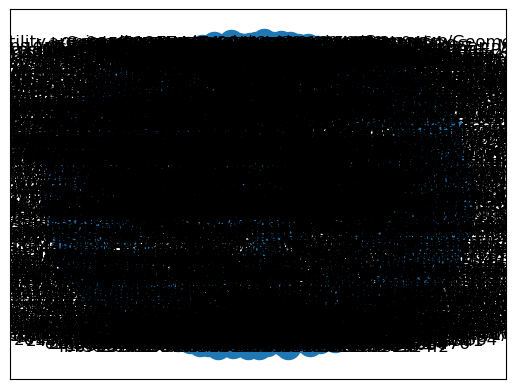

In [13]:
nx.draw_networkx(G)

In [35]:
options = {
  "edges": {
    "arrows": {
      "from": {
        "enabled": True
      }
    },
    "color": {
      "inherit": True
    },
    "font": {
      "size": 8
    },
    "smooth": True
  },
  "interaction": {
    "hover": True
  },
  "manipulation": {
    "enabled": False,
    "initiallyActive": False
  },
  "physics": {
    "barnesHut": {
      "gravitationalConstant": -1000,
      "springLength": 50,
      "avoidOverlap": 0.4
    },
    "minVelocity": 0.75
  }
}

In [36]:
net = Network(height=2000, width=3000,bgcolor='#222222', font_color='white') # add notebook = True 
net.set_options(json.dumps(options))
#net.show_buttons(False)
net.from_nx(G)

In [33]:
net

<class 'pyvis.network.Network'> |N|=649 |E|=694

In [37]:
neighbor_map = net.get_adj_list()

net.show("hello.html", notebook = False)

hello.html
